In [9]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from spatial_transformer import SpatialTransformer
import tensorflow as tf
import cv2

In [10]:
img_data_path = '../../violation_data/train/view1_violation.h5'
img_data = h5py.File(img_data_path,'r')
print(img_data.keys())

<KeysViewHDF5 ['color_images', 'density_maps', 'images']>


In [11]:
imgs = img_data['color_images']

In [12]:
print(imgs[0].shape)
test_img = imgs[0].astype(np.uint8)


(380, 676, 3)


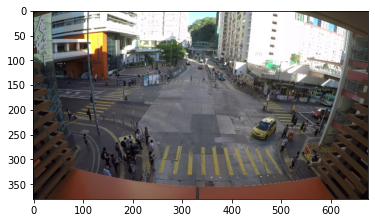

In [13]:
plt.imshow(test_img)

In [14]:
test_img = imgs[0]
test_img = cv2.resize(test_img,(676//4,380//4))

In [15]:
print(test_img.shape)
#test_img = np.expand_dims(test_img,axis=-1)
test_img = np.expand_dims(test_img,axis=0)
print(test_img.shape)


(95, 169, 3)
(1, 95, 169, 3)


In [25]:
result = SpatialTransformer(1,[192,160])(test_img)
print(result)

Tensor("spatial_transformer_3/Mul_16:0", shape=(1, 192, 160, 3), dtype=float32)


In [26]:
with tf.compat.v1.Session() as sess:
    result = sess.run(result)

In [27]:
result = np.asarray(result)

(1, 192, 160, 3)


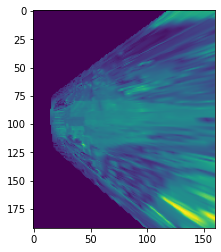

In [28]:
print(result.shape)
plt.imshow(result.squeeze()[:,:,1])
#print(result.squeeze()[:,:,1]==result.squeeze()[:,:,2])